In [1]:
# import
import sys
sys.path.append('../')

import logging
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

from tissue_clustering import Tissues, find_DBSCAN_clusters
from loss import loss_fct
from visualization_utils import show_clusters, show_only_clusters
from slicing import slice_volume

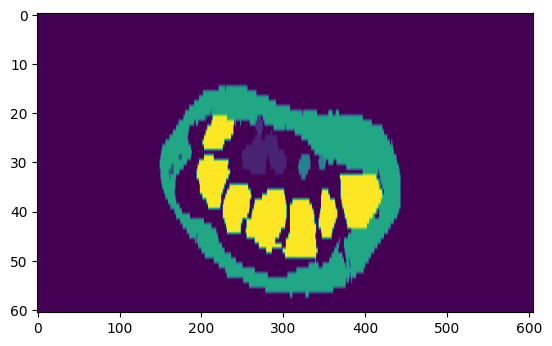

In [2]:
# Load the image data
volume = sitk.ReadImage('..\MRI\Labels\labels_00001.nii')
img_array = sitk.GetArrayFromImage(volume)

# Take a 2D image slice
slice_num = 670
slice = img_array[:, slice_num, :]
plt.imshow(slice, aspect=6)
plt.show()

In [3]:
tissues = { "bones": 20,
            "tendins": 2,
            "ulnar": 3,}
tissuesClass = Tissues(tissues_dict=tissues)

Found 4 clusters
Found 2 clusters
Found 0 clusters
####################################################
Calculating loss function:
Orientation: bones over tendins
No ulnar artery found
Landmark loss: 4
Missing landmark loss: 1
Location loss: 1
Total loss: 0.5777777777777777
#################################################### 



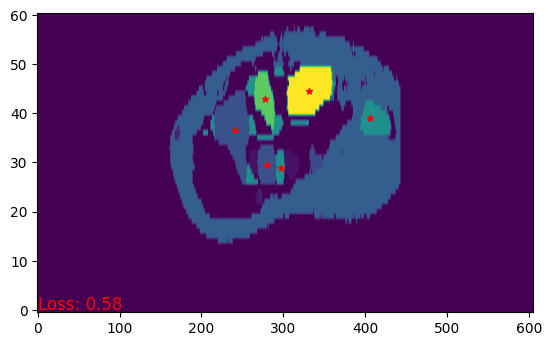

In [8]:
slice = slice_volume(z_rotation=0., x_rotation=0., translation=[0, 160, 0], volume=volume)
slice = sitk.GetArrayFromImage(slice)[:, 0, :]

clusters = {}
clusters['bones'] = find_DBSCAN_clusters(tissues['bones'], slice, eps=4.1, min_samples=46)
clusters['tendins'] = find_DBSCAN_clusters(tissues['tendins'], slice, eps=4.1, min_samples=46)
clusters['ulnar'] = find_DBSCAN_clusters(tissues['ulnar'], slice, eps=2.5, min_samples=18)
show_clusters(clusters, slice)

# Loss function
loss = loss_fct(clusters)
plt.text(0, 0, f"Loss: {loss:.2f}", fontsize=12, color='red')

plt.show()
